In [41]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
%matplotlib inline
import seaborn as sns

In [42]:
df=pd.read_csv('Density_Prediction_Dataset.csv')

In [43]:
df.head()

,Nano Particle,Base Fluid,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ)
0,Al₂O₃/SiO₂,Water,20,0.05,3890,2220,998.29,20,80,1004.814815
1,Al₂O₃/SiO₂,Water,30,0.05,3890,2220,995.71,20,80,1002.222222
2,Al₂O₃/SiO₂,Water,40,0.05,3890,2220,992.25,20,80,997.037037
3,Al₂O₃/SiO₂,Water,50,0.05,3890,2220,988.02,20,80,994.444444
4,Al₂O₃/SiO₂,Water,60,0.05,3890,2220,983.13,20,80,990.000000


In [44]:
df.isnull().sum()

Nano Particle                       0
Base Fluid                          0
Temperature (°C)                    0
Volume Concentration (ϕ)            0
Density of Nano Particle 1 (ρnp)    0
Density of Nano Particle 2 (ρnp)    0
Density of Base Fluid (ρbf)         0
Volume Mixture of Particle 1        0
Volume Mixture of Particle 2        0
Density (ρ)                         0
dtype: int64

In [45]:
df.dtypes

Nano Particle                        object
Base Fluid                           object
Temperature (°C)                      int64
Volume Concentration (ϕ)            float64
Density of Nano Particle 1 (ρnp)      int64
Density of Nano Particle 2 (ρnp)      int64
Density of Base Fluid (ρbf)         float64
Volume Mixture of Particle 1          int64
Volume Mixture of Particle 2          int64
Density (ρ)                         float64
dtype: object

In [46]:
df.duplicated().sum()

0

In [47]:
df['Temperature (°C)'] = pd.to_numeric(df['Temperature (°C)'], errors='coerce')

In [48]:
numeric_df = df.select_dtypes(include=[np.number])
numeric_df.columns

Index(['Temperature (°C)', 'Volume Concentration (ϕ)',
       'Density of Nano Particle 1 (ρnp)', 'Density of Nano Particle 2 (ρnp)',
       'Density of Base Fluid (ρbf)', 'Volume Mixture of Particle 1',
       'Volume Mixture of Particle 2', 'Density (ρ)'],
      dtype='object')

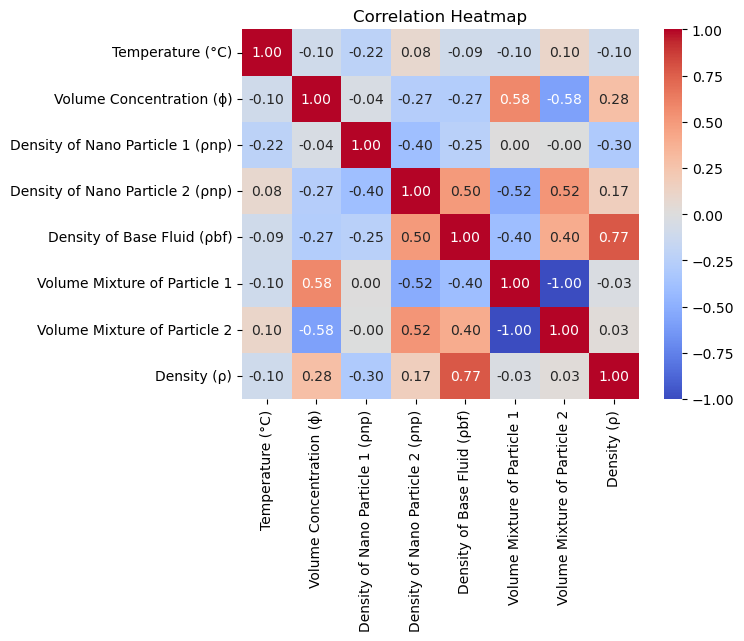

In [49]:
plt.figure()
correlation=numeric_df.corr()
sns.heatmap(correlation,annot=True,cmap='coolwarm',fmt='.2f')
plt.title('Correlation Heatmap')
plt.show()

<Figure size 4000x1600 with 0 Axes>

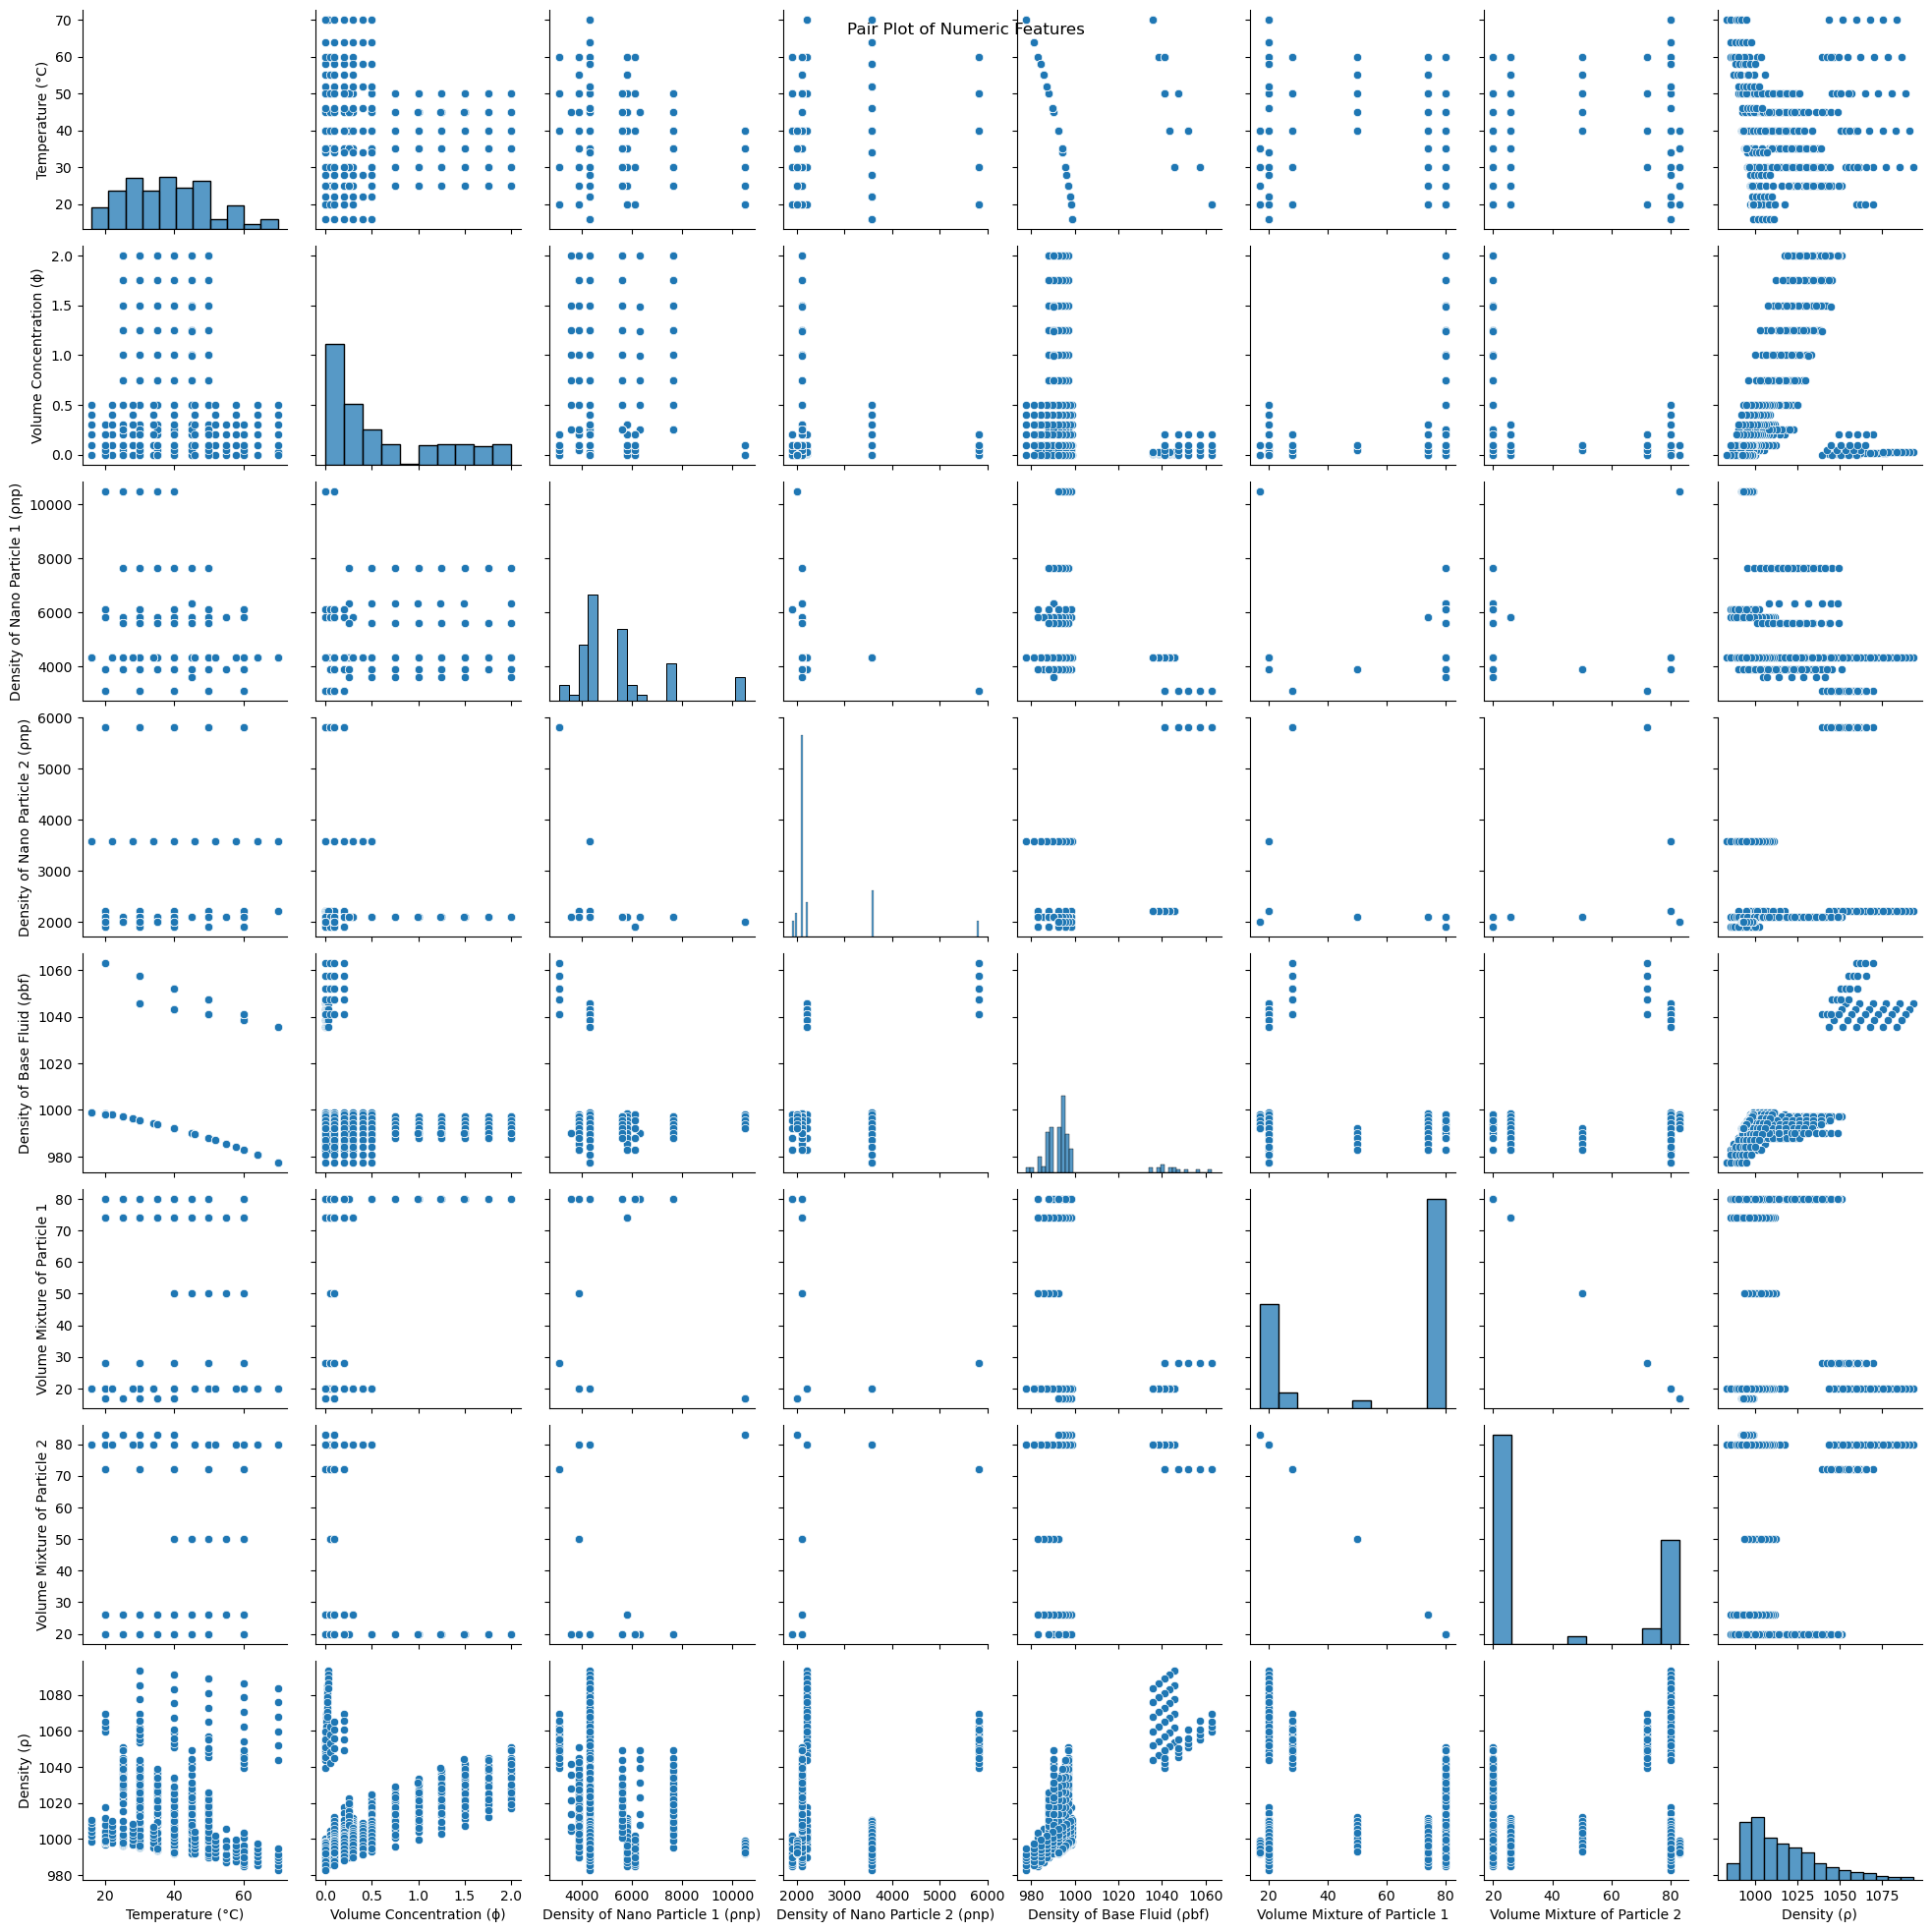

In [50]:
plt.figure(figsize=(40, 16))
sns.pairplot(numeric_df)
plt.suptitle('Pair Plot of Numeric Features')
plt.show()

C:\Users\User\AppData\Local\Temp\ipykernel_14448\1380727045.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.countplot(x='Nano Particle',data=df,palette='viridis')


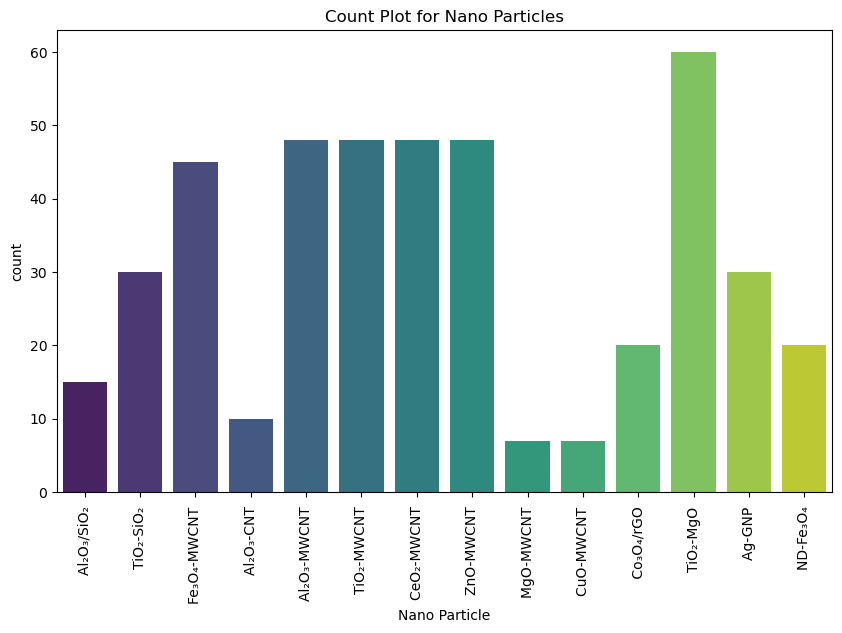

In [51]:
plt.figure(figsize=(10,6))
sns.countplot(x='Nano Particle',data=df,palette='viridis')
plt.xticks(rotation=90) 
plt.title('Count Plot for Nano Particles')
plt.show()

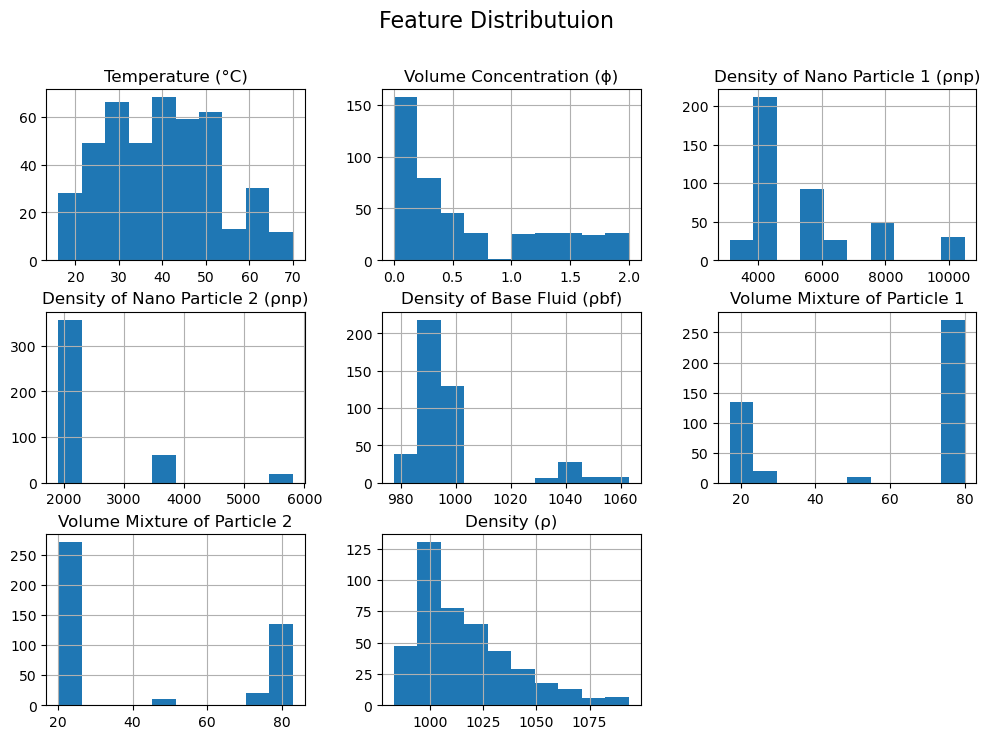

In [52]:
df[numeric_df.columns].hist(figsize=(12,8),bins=10)
plt.suptitle('Feature Distributuion',fontsize=16)
plt.show()

In [53]:
# Creating new feature : total volume mixture
df['Total Volume Mixture']=df['Volume Mixture of Particle 1']+df['Volume Mixture of Particle 1']
df.head()

,Nano Particle,Base Fluid,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ),Total Volume Mixture
0,Al₂O₃/SiO₂,Water,20,0.05,3890,2220,998.29,20,80,1004.814815,40
1,Al₂O₃/SiO₂,Water,30,0.05,3890,2220,995.71,20,80,1002.222222,40
2,Al₂O₃/SiO₂,Water,40,0.05,3890,2220,992.25,20,80,997.037037,40
3,Al₂O₃/SiO₂,Water,50,0.05,3890,2220,988.02,20,80,994.444444,40
4,Al₂O₃/SiO₂,Water,60,0.05,3890,2220,983.13,20,80,990.000000,40


In [54]:
df['Total Volume Mixture'].describe()

count    436.000000
mean     115.045872
std       56.037325
min       34.000000
25%       40.000000
50%      160.000000
75%      160.000000
max      160.000000
Name: Total Volume Mixture, dtype: float64

In [63]:
from sklearn.model_selection import train_test_split
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error, r2_score
from sklearn.model_selection import GridSearchCV
from sklearn.ensemble import RandomForestClassifier

In [56]:
df.drop(['Nano Particle'],axis=1,inplace=True)
df.head()


,Base Fluid,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ),Total Volume Mixture
0,Water,20,0.05,3890,2220,998.29,20,80,1004.814815,40
1,Water,30,0.05,3890,2220,995.71,20,80,1002.222222,40
2,Water,40,0.05,3890,2220,992.25,20,80,997.037037,40
3,Water,50,0.05,3890,2220,988.02,20,80,994.444444,40
4,Water,60,0.05,3890,2220,983.13,20,80,990.000000,40


In [57]:
df.drop(['Base Fluid'],axis=1,inplace=True)
df.head()


,Temperature (°C),Volume Concentration (ϕ),Density of Nano Particle 1 (ρnp),Density of Nano Particle 2 (ρnp),Density of Base Fluid (ρbf),Volume Mixture of Particle 1,Volume Mixture of Particle 2,Density (ρ),Total Volume Mixture
0,20,0.05,3890,2220,998.29,20,80,1004.814815,40
1,30,0.05,3890,2220,995.71,20,80,1002.222222,40
2,40,0.05,3890,2220,992.25,20,80,997.037037,40
3,50,0.05,3890,2220,988.02,20,80,994.444444,40
4,60,0.05,3890,2220,983.13,20,80,990.000000,40


In [59]:
X=df.drop(['Density (ρ)'],axis=1)
y=df['Density (ρ)']

In [60]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Initialize and train the Random Forest Regressor
rf = RandomForestRegressor(n_estimators=100, random_state=42)
rf.fit(X_train, y_train)

# Predict on the test set
y_pred = rf.predict(X_test)

# Evaluate the model
mse = mean_squared_error(y_test, y_pred)
r2 = r2_score(y_test, y_pred)
print(f'Mean Squared Error: {mse}')
print(f'R² Score: {r2}')

Mean Squared Error: 23.050486368902266
R² Score: 0.9639042183248918


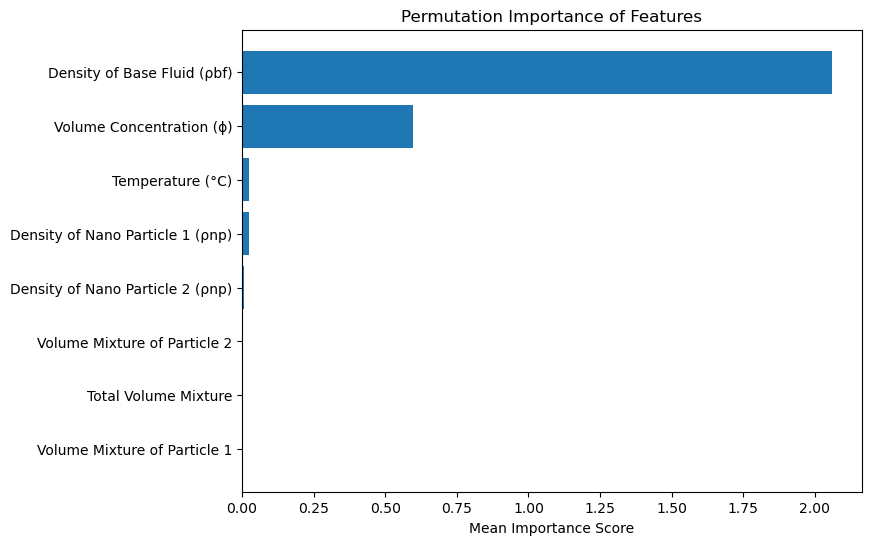

In [68]:
from sklearn.inspection import permutation_importance

#Compute permutation importance
parm_importance = permutation_importance(rf, X_test, y_test, n_repeats=20, random_state=42)

# Create a dataframe for permutation importance
parm_df = pd.DataFrame({'Feature': X.columns, 'Importance': parm_importance.importances_mean})
parm_df = parm_df.sort_values(by='Importance', ascending=True)

plt.figure(figsize=(8, 6))
plt.barh(parm_df['Feature'], parm_df['Importance'])
plt.xlabel('Mean Importance Score')
plt.title('Permutation Importance of Features')
plt.show()

In [70]:
train_accuracy = rf.score(X_train, y_train)
test_accuracy = rf.score(X_test, y_test)

print(f"Training Accuracy: {train_accuracy:.4f}")
print(f"Testing Accuracy: {test_accuracy:.4f}")

Training Accuracy: 0.9970
Testing Accuracy: 0.9639


The correlation heatmap and the final plot of mean importance conclude that the density if base 